# K-Nearest Neighbors: From Application to Theory

## Table of Contents

- [1 Introduction](#1-introduction)
- [2 Application](#2-application)
    - [2.1 Context and Disclaimer](#21-context-and-disclaimer)
    - [2.2 Data Collection](#22-data-collection)
        - [2.2.1 Using scikit-learn’s Datasets](#221-using-scikit-learns-datasets)
    - [2.3 Preparing the Data](#23-preparing-the-data)
    - [2.4 Building the KNN Model](#24-building-the-knn-model)
        - [2.4.1 Choosing the Value of K](#241-choosing-the-value-of-k)
    - [2.5 Making Predictions](#25-making-predictions)
    - [2.6 Analysis](#26-analysis)
        - [2.6.1 Comparing Results](#261-comparing-results)
        - [2.6.2 Assessing the Model](#262-assessing-the-model)
        - [2.6.3 Why These Results for the Iris Dataset](#263-why-these-results-for-the-iris-dataset)
    - [2.7 Improving the Model](#27-improving-the-model)
        - [2.7.1 Scaling the Features](#271-scaling-the-features)
        - [2.7.2 Distance Metrics](#272-distance-metrics)
    - [2.8 Application Conclusion](#28-application-conclusion)
- [3 Theory](#3-theory)
    - [3.1 Introduction to the Theory](#31-introduction-to-the-theory)
    - [3.2 How KNN Works](#32-how-knn-works)
    - [3.3 The K Parameter](#33-the-k-parameter)
    - [3.4 Distance Metrics](#34-distance-metrics)
        - [3.4.1 Euclidean Distance](#341-euclidean-distance)
        - [3.4.2 Manhattan Distance](#342-manhattan-distance)
        - [3.4.3 Cosine Similarity](#343-cosine-similarity)
        - [3.4.4 Hamming Distance](#344-hamming-distance)
        - [3.4.5 Jaccard Similarity](#345-jaccard-similarity)
        - [3.4.6 Minkowski Distance](#346-minkowski-distance)
        - [3.4.7 Mahalanobis Distance](#347-mahalanobis-distance)
    - [3.5 Computational Complexity](#35-computational-complexity)
        - [3.5.1 Brute-Force Search](#351-brute-force-search)
        - [3.5.2 K-D Trees](#352-k-d-trees)
- [4 Conclusion](#4-conclusion)
    - [4.1 Next Steps](#41-next-steps)


## 1 Introduction

![22708Screenshot 2021-05-14 at 7.16.28 PM.png](<attachment:22708Screenshot 2021-05-14 at 7.16.28 PM.png>)

K-Nearest Neighbors, also known as KNN, is an easy-to-understand yet powerful tool used in machine learning for sorting data into categories or predicting numerical values. When you have a new piece of data and you want to either classify it into a group or predict a value for it, KNN can help. It scans through all the existing data you already have to find the most similar items to your new data.

After identifying the most similar items, the algorithm selects a predetermined 'K' number of these items to make an informed decision. The value of 'K' is something you choose beforehand, based on the characteristics of your dataset and the problem you're trying to solve. 

For classification tasks, KNN determines which category the majority of these 'K' most similar items belong to and assigns that category to your new data. If you're looking to predict a numerical value instead, the algorithm takes the average of these 'K' closest items. By leveraging what it already knows from your existing dataset, KNN provides a well-grounded estimate for classifying or predicting your new data.


## 2 Application

### 2.1 Context and Disclaimer
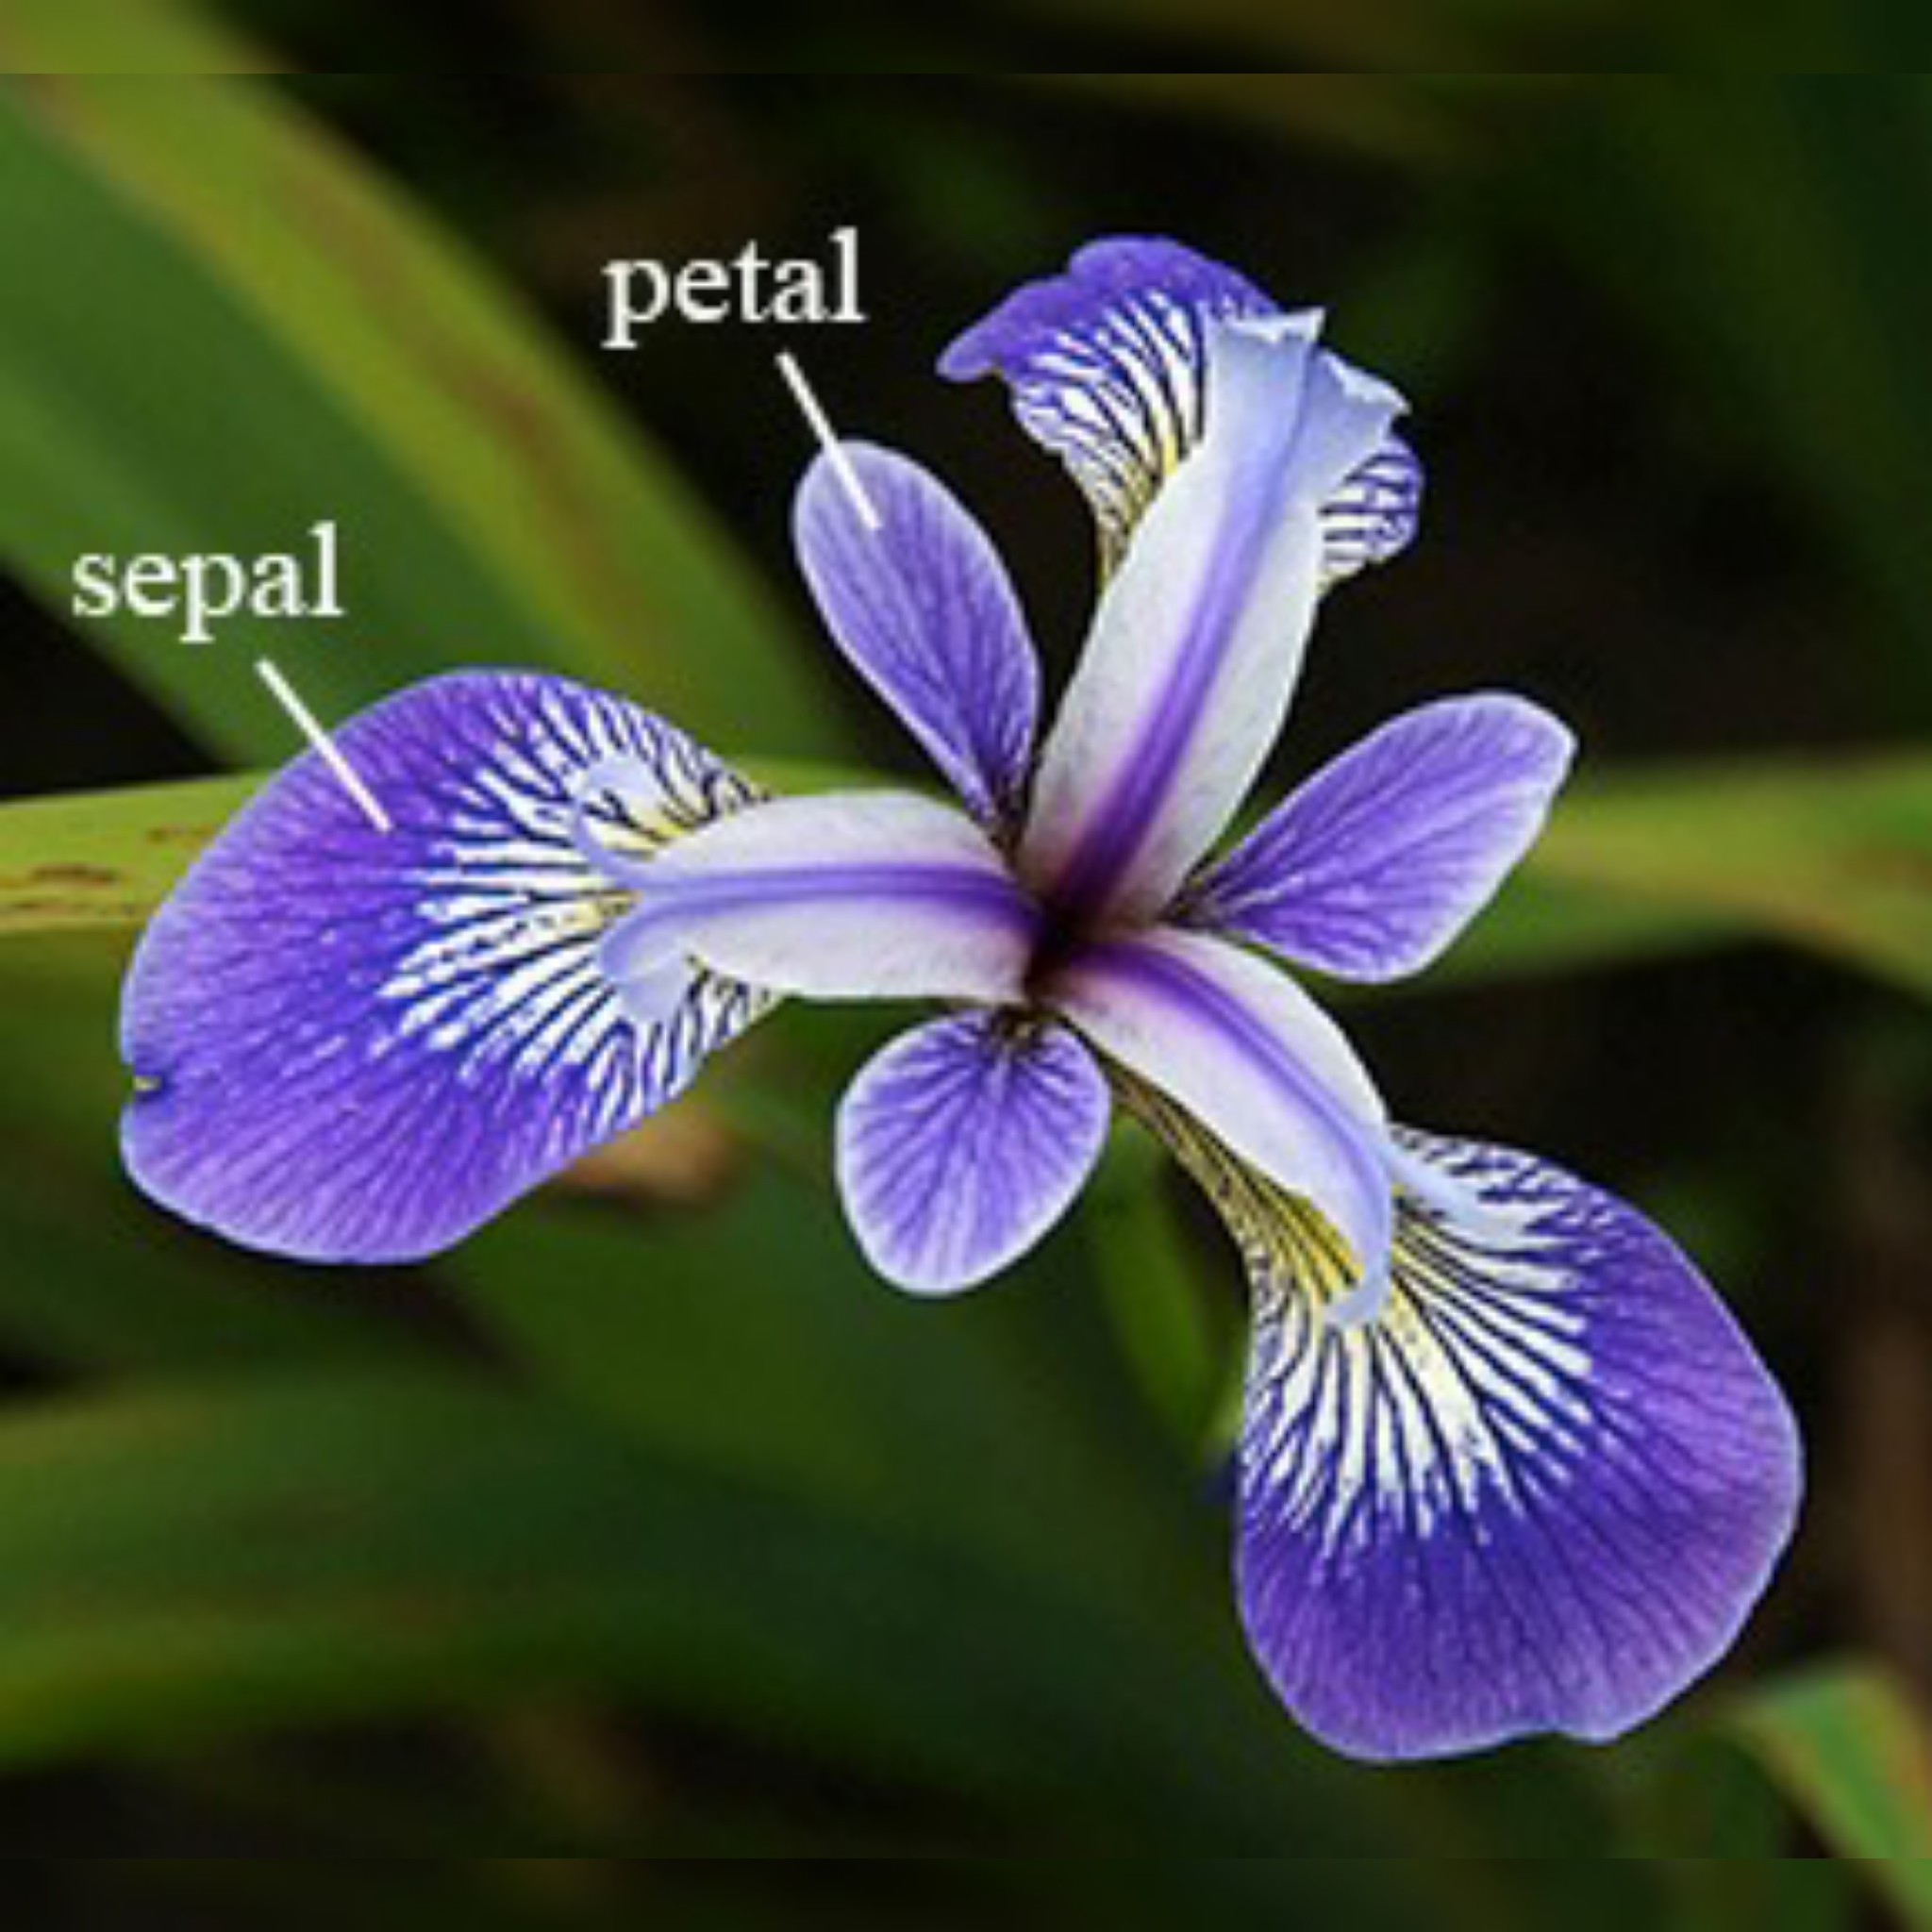

Before diving into any machine learning algorithm, it's crucial to grasp the context of the problem we aim to solve. For this demonstration, we're using the Iris dataset—a classic in the educational sphere. This dataset allows us to classify iris flowers into different species based on four key attributes: sepal length, sepal width, petal length, and petal width. The Iris dataset is a great starting point because it's simple and well-understood, letting you focus on the algorithm rather than wrestling with complex data preprocessing. However, it's worth noting that while the Iris dataset is excellent for educational purposes, it doesn't capture the complexity and nuances typical of real-world data scenarios.

The Iris dataset consists of 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The target variable represents the species, which can be one of three types: setosa, versicolor, or virginica.

Below is a markdown table representing a subset of the Iris dataset, with labeled columns and rows for illustrative purposes:

| Row | Sepal Length | Sepal Width | Petal Length | Petal Width | Species |
|-----|--------------|-------------|--------------|-------------|---------|
| 1   | 5.1          | 3.5         | 1.4          | 0.2         | setosa  |
| 2   | 4.9          | 3.0         | 1.4          | 0.2         | setosa  |
| 3   | 4.7          | 3.2         | 1.3          | 0.2         | setosa  |
| ... | ...          | ...         | ...          | ...         | ...     |
| 148 | 6.5          | 3.0         | 5.2          | 2.0         | virginica|
| 149 | 6.2          | 3.4         | 5.4          | 2.3         | virginica|
| 150 | 5.9          | 3.0         | 5.1          | 1.8         | virginica|

### 2.2 Data Collection

#### 2.2.1 Using scikit-learn's Datasets

Scikit-learn, or sklearn, provides tons of tools and datasets, including the Iris dataset we'll be using. You can load it as follows:
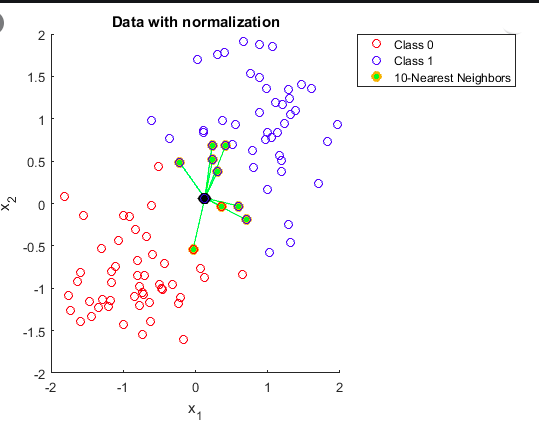

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In this scenario, `data` acts like a dictionary. You can find the measurements you need (Sepal Length, Sepal Width, Petal Length, Petal Width) in `data.data`:

In [2]:
print(f"(rows, columns): {data.data.shape}\n")
print(data.data)

(rows, columns): (150, 4)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.

The labels, which is the species of each flower, can be found in `data.target`:

In [3]:
print(data.target)
print(data.target_names)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


### 2.3 Preparing the Data

Just like we've done in our [Linear Regression](../linear-regression/Linear%20Regression.ipynb) and [Logistic Regression](../logistic-regression/Logistic%20Regression.ipynb) tutorials, it's essential to split our dataset into training and testing sets when working with KNN. This practice serves two vital roles. First, the training set is used to "train" the model, which for KNN, essentially means storing the data. Second, the testing set allows us to validate how well the model performs on new, unseen data. The process of splitting data into training and testing sets is even more crucial when dealing with KNN. This is because KNN relies on the proximity of data points to make predictions. Therefore, the algorithm is highly sensitive to how the data points are distributed in the training set. If the training data isn't representative of the general population, the KNN model may perform poorly when exposed to the testing set or new data. In essence, a well-chosen training set is vital for KNN's accuracy and effectiveness.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In this code, `X_train` and `X_test` are the features, the measurements, split into training and testing sets, and `y_train` and `y_test` are the labels, the species of iris flower. We also specified:
- `test_size = 0.2`: We'll keep 20% of the data for testing and the rest gets used for training.
- `random_state = 42`: This number ensures that anyone running this code gets the same 'random' split, making it easier to compare results.

In many data science projects, you normally have to pick the most useful features for your model, a process known as "feature selection." This is crucial for models like logistic or linear regression, where irrelevant features can reduce accuracy. However, in the case of this Iris dataset, every feature, like petal length or sepal width, is useful for classification. So, there's no need to remove any features; we can use all of the features to predict the iris species accurately. In other words, we can skip the "feature selection" step and move on to building the model.

### 2.4 Building the K-NN Model

Once the data is prepared, it's time to construct the K-Nearest Neighbors (K-NN) model. The K-NN algorithm is often called a 'lazy learner' because, instead of learning rules from the training data, it simply stores the data. This makes it fast to set up but possibly slow when you actually use it, as it has to look through the stored data to find nearest neighbors. 

Here's how we'll construct the K-NN model:

1. **Initialize the Model**: Import the K-NN classifier from a library like scikit-learn and initialize it. K-NN stands for K-Nearest Neighbors. It's a simple algorithm that stores all available cases (your training data) and classifies new cases based on a similarity measure, in our case, distance.

2. **Train the Model**: As previously mentioned, K-NN is a lazy learner, meaning it doesn't really "train" in the way other algorithms do. Instead, it stores the training data. When you need to make a prediction, it will look for the 'K' nearest neighbors in this stored data. This makes the model fast to train but slow to test.

3. **Test the Model**: Use your test data to see how well the model classifies new samples. It will use the 'K' nearest neighbors from the training data to make this classification.

#### 2.4.1 Choosing the Value of $ K $

#### 2.4.1 Picking the Right Number of Neighbors (K)

The $ K $ in K-NN tells us how many of the closest old data points (neighbors) the algorithm looks at when deciding the category of a new data point. Picking the right $ K $ is crucial for how well your model works.

1. **Low $ K $ Number**: Picking a small $ K $, like 1 or 3, makes your model pay too much attention to random fluctuations or outliers, causing it to perform poorly on new data (known as overfitting).

2. **High $ K $ Number**: Choosing a big $ K $, like 50 or 100, makes the model too lax, making it perform poorly because it's too generalized (known as underfitting).

3. **How to Pick $ K $**:
    - Use odd numbers to prevent tie situations.
    - A common starting point is to use the square root of the total number of data points.
    - Using cross-validation, discussed in [linear regression - deeper dive section 2.6.1](../linear-regression/Linear%20Regression%20-%20Deeper%20Dive.ipynb), can help you find the best $ K $. It tests how well your model works on new, unseen data.

4. **Type of Distance**: The way you measure distance between points (like Euclidean or Manhattan distance) can change how well your model does. It's good to try out different types to see what works best.

Now, we've already loaded the dataset and split it into training and test sets. Let's continue by initializing and using the K-NN model.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model with K=5 (5 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model (In K-NN, this step is effectively storing the training data)
knn.fit(X_train, y_train)

KNeighborsClassifier()

This code snippet initializes a K-NN classifier with $ K=5 $, and then trains it on the training set. Next we'll use the model to make predictions using our testing data, in this way we'll be able to evaluate it.

### 2.5 Making Predictions

Once the K-NN model is initialized and "trained" (which, remember, is just storing the training data), the next step is to use this model to make predictions on new, unseen data. This is usually the test set, which the model hasn't been exposed to during training.

**Steps for Making Predictions:**

1. **Use the `predict` Method**: The `predict` method in scikit-learn takes an array of new data points and returns an array of predicted labels. The algorithm finds the 'K' nearest neighbors for each point in the test set, and then votes to classify each point.
  
2. **Review the Output**: The output will be a list of labels, one for each test data point. You can compare these predicted labels to the actual labels to assess the model's performance.

Here's how to do it:

In [6]:
# Use the model to predict the test set
y_pred = knn.predict(X_test)

In this snippet, `y_pred` will store the predicted labels for `X_test`. You can now compare these to `y_test`, the true labels, to evaluate your model's performance.

### 2.6 Analysis

After making predictions, it's crucial to evaluate the performance of the model to understand its strengths and weaknesses. 

#### 2.6.1 Comparing Results

The first step in our analysis would be to compare the predicted labels (`y_pred`) against the true labels (`y_test`). For this, a variety of metrics are available. One basic metric for classification models is accuracy, which measures the fraction of correctly classified samples.

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 1.0


- **Model Accuracy**: 1.0  
This means the model correctly classified all the test points. An accuracy of 1.0 or 100% is excellent but rare. Be cautious; this could also mean that the model is overfitting or that the test dataset is not representative.

Depending on the problem, you might also be interested in other metrics like precision, recall, or the F1 score:

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- **Classification Report**:  
The report indicates precision, recall, and F1-score of 1.0 for each class, which is in line with the perfect accuracy.

#### 2.6.2 Assessing the Model

We can also analyze the confusion matrix to gain key insights into false positives, false negatives, true positives, and true negatives:

In [9]:
from sklearn.metrics import confusion_matrix

# Show confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


- **Confusion Matrix**:
  ```
  [[10  0  0]
   [ 0  9  0]
   [ 0  0 11]]
  ```  
The diagonal elements (10, 9, 11) represent the number of points for each class (0, 1, and 2) that were correctly classified. The off-diagonal elements are all zero, indicating no misclassifications.

Given these metrics, we can assess the model's performance in a more nuanced way.

1. **General Performance**: The accuracy is 1.0, which usually means your model is performing exceptionally well.
  
2. **Per-class Metrics**: The classification report also shows 1.0 across all metrics for each class. This is an indicator that your model is well-calibrated for all classes.

3. **Potential Overfitting**: Achieving a perfect score can sometimes be a red flag for overfitting. However, if you've properly separated your training and testing data and the dataset is representative, then it might just be that the model is effective.

#### 2.6.3 Why These Results for the Iris Dataset?

The Iris dataset is often considered a 'friendly' dataset for machine learning beginners because the features are well-separated across different classes. This dataset is relatively simple and doesn't have much overlap between the different iris flower species, making it easier for the model to classify them accurately.

- **High Dimensionality**: The Iris dataset includes four features for each sample, allowing for more dimensions in which the data can be separated.
  
- **Low Noise**: The measurements are consistent and taken in a controlled environment, so the dataset doesn't have much noise.
  
- **Clear Boundaries**: The species of iris flowers in the dataset are distinctly different in their petal and sepal sizes, making them easier to classify.

### 2.7 Improving the Model

Even if you've obtained a model with high accuracy, there's generally room for improvement. Not every dataset will be as well-behaved as the Iris dataset.

#### 2.7.1 Scaling the Features

In many datasets, each feature (or column of data) can have different units or ranges. For example, one feature could be age (ranging from 0 to 100), and another could be income (ranging from thousands to millions). The K-NN algorithm calculates the "distance" between data points to make its predictions, so if these features are on different scales, the one with the larger range could unduly influence the result.

**What is Scaling?**

Scaling solves this by transforming all features to be on a similar scale, commonly with a mean (average) of 0 and a variance (spread) of 1. This way, each feature gets an equal say in the distance calculation.

**What is Standard Scaling?**

Standard scaling is a preprocessing technique used to standardize or normalize the features of a dataset. In more technical terms, it transforms each feature in the dataset so that it has a mean of 0 and a standard deviation of 1. Mean is the average of all values for the feature and standard deviation is a measure of the amount of variation or dispersion in the feature.


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

# First learns the mean and variance of each feature in the training set, and then scales it.
X_train_scaled = scaler.fit_transform(X_train) 

# Uses the mean and variance learned from the training set to scale the test set.
X_test_scaled = scaler.transform(X_test)

# Initialize and train the K-NN model on the scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5) 
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

- `StandardScaler()`: Initializes the scaling method we're using, which is standard scaling.
- `fit_transform(X_train)`: The 'fit' part calculates the mean and variance for each feature from your training data. The 'transform' part scales the training data using those calculated values.
- `transform(X_test)`: This scales the test data using the same mean and variance values learned from the training data. This ensures consistency.
- `KNeighborsClassifier(n_neighbors=5)`: Initializes a K-NN model that will look at 5 nearest neighbors.
- `fit(X_train_scaled, y_train)`: This is where the model gets trained. It takes the scaled training data and the corresponding labels (`y_train`) to learn how to make future predictions.

By doing this, we ensure that the K-NN algorithm treats all features equally when calculating distances, leading to potentially better performance.

#### 2.7.2 Distance Metrics

The K-NN algorithm works by finding the "nearest neighbors" to a given data point. To determine what "nearest" means, K-NN uses a distance metric, a mathematical formula for calculating the distance between two points.

**Common Distance Metrics**

Some common distance metrics include:

1. **Euclidean Distance**: This is the most common and is similar to the "straight-line" distance between two points in a plane. It's generally a good default choice.
  
2. **Manhattan Distance**: Instead of a straight line, imagine moving along grid lines, like a taxi driving on streets that form a grid. It's sometimes more suitable for high-dimensional data.

3. **Minkowski Distance**: This is a generalized form of distance metrics. Both Euclidean and Manhattan are special cases of Minkowski distance. You can adjust a parameter to make it behave like Euclidean or Manhattan distance.

4. **Hamming Distance**: Useful for categorical attributes, Hamming distance counts the number of positions at which the corresponding elements of two strings are different.

**Why Does the Choice Matter?**

Different metrics can yield different results based on the nature of your data. For example, if your data has many dimensions (features), the Euclidean distance might not be as effective, and Manhattan distance could be a better choice. Some metrics might be more sensitive to outliers, while others may be better for categorical data.

**Experimentation is Key**

The only surefire way to know which distance metric works best for your specific dataset is to try them out. Use different metrics, compare the results, and choose the one that gives you the best performance.

So, when constructing your K-NN model, the choice of distance metric isn't just a minor detail; it's a critical decision that can significantly affect how well your model performs.


In [11]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

By fine-tuning aspects such as feature scaling and distance metrics, we can further optimize an already proficient model to achieve even more reliable and robust performance. The key lies in adapting the model to suit the specific characteristics of the problem we're tackling.

### 2.8 Application Conclusion

Having journeyed through the process of setting up, training, and fine-tuning a K-NN model on the Iris dataset, it's clear that this algorithm is both versatile and relatively easy to implement. The model's high accuracy on this dataset showcases its effectiveness for classification tasks, particularly when the dataset is clean and well-structured.

That said, no model is a one-size-fits-all solution. Depending on the complexity and nature of different datasets, the K-NN model may require more or less adjustment in terms of feature scaling or distance metrics.

The broader lesson here is the value of experimentation and iterative refinement in machine learning. Even when a model performs exceptionally well, as ours did on the Iris dataset, there's always room for improvement and optimization.

## 3 Theory

### 3.1 Introduction to the Theory

K-NN is categorized as instance-based learning or lazy learning. What this means is that the algorithm doesn't explicitly learn a model during a "training" phase. Rather, it stores all the training examples and delays the computational work until a new data point needs to be classified or a prediction must be made.

### 3.2 How KNN Works

In K-NN, each data point in your dataset is considered a point in N-dimensional space, where N is the number of features. When a new data point needs to be classified, K-NN performs the following steps:

1. **Calculate Distances**: Computes the distance between the new data point and every other point in the dataset. The distance can be calculated using various metrics like Euclidean, Manhattan, etc.
  
  - **Euclidean Distance**: $ d(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 } $

2. **Sort and Select**: Sorts all the calculated distances in ascending order and picks the first 'K' points.

3. **Majority Vote**: Among these K nearest neighbors, it counts the occurrences of each class and assigns the class that appears the most to the new data point.

  - **Classification**: $ \text{Assigned Class} = \text{Mode(Class of K nearest neighbors)} $
  
  - **Regression**: $ \text{Assigned Value} = \text{Average(Value of K nearest neighbors)} $

### 3.3 The K Parameter

Choosing the right value for 'K' is paramount for the algorithm's effectiveness:

1. **Small K**: A small K, like 1 or 3, makes the algorithm susceptible to noise and outliers, which can lead to overfitting. Mathematically, this leads to a very "jagged" decision boundary.

2. **Large K**: A large K smooths out the decision boundaries, which can make the model too generalized and prone to underfitting.

3. **Choosing the Right K**: 
  - Starting with an odd number can help avoid ties.
  - Using the square root of the sample size is a common initial guess.
  - For a more rigorous selection, cross-validation can be used. This involves splitting the dataset multiple ways and averaging the performance metric to see which K value is most effective.

Understanding the underlying math and decision-making process in K-NN provides you with the tools to apply it more effectively, allowing you to make more accurate predictions or classifications.

### 3.4 Distance Metrics

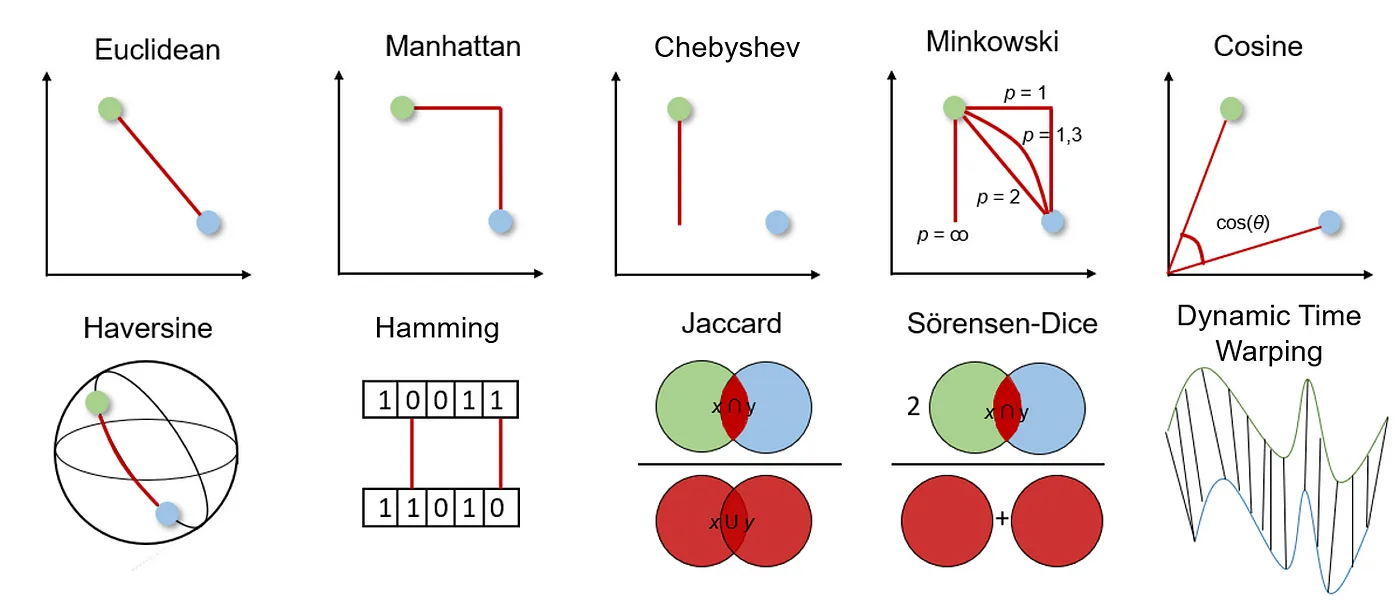

#### 3.4.1 Euclidean Distance

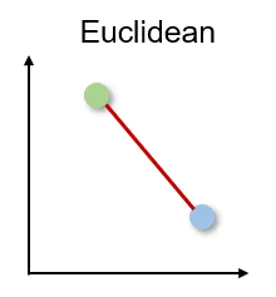

This is the most commonly used distance metric and it's likely the one you're most familiar with. It calculates the straight-line distance between two points in N-dimensional space. The formula for Euclidean distance between two points $ A $ and $ B $ with coordinates $ (x_1, x_2, ..., x_n) $ and $ (y_1, y_2, ..., y_n) $ is:

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

For example, in a 2-dimensional space with points $ A(1, 2) $ and $ B(4, 6) $, the Euclidean distance would be $ \sqrt{(4 - 1)^2 + (6 - 2)^2} = \sqrt{9 + 16} = \sqrt{25} = 5 $.

#### 3.4.2 Manhattan Distance

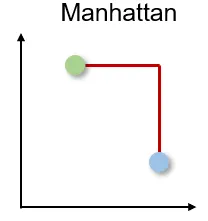

Manhattan distance, also known as "city block" distance, measures the distance between two points by traversing only along the grid lines. For N-dimensional points $ A $ and $ B $, the Manhattan distance is computed as:

$$
d(A, B) = \sum_{i=1}^{n} |x_i - y_i|
$$

For instance, for the same 2-dimensional points $ A(1, 2) $ and $ B(4, 6) $, the Manhattan distance would be $ |4 - 1| + |6 - 2| = 3 + 4 = 7 $.

Each of these metrics has its advantages and drawbacks depending on the nature of the dataset and the problem you're trying to solve. It's often beneficial to experiment with different distance metrics to find the one that gives the best results for your specific case.

#### 3.4.3 Cosine Similarity

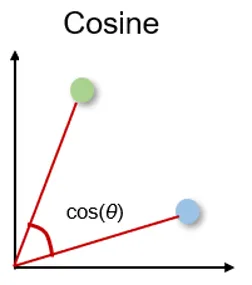

Cosine similarity measures the cosine of the angle between two vectors. This metric is particularly useful when you want to determine how similar two documents or sets of data are irrespective of their size.

$$
\text{Cosine Similarity}(A, B) = \frac{A \cdot B}{||A|| \times ||B||}
$$

#### 3.4.4 Hamming Distance

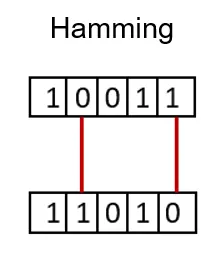

Hamming distance is used for categorical variables. If the value (or label) of the $i^{th}$ variable is different between two points, then the distance is incremented by one.

$$
\text{Hamming Distance}(A, B) = \sum_{i=1}^{n} (a_i \neq b_i)
$$

#### 3.4.5 Jaccard Similarity

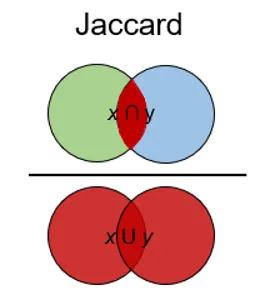

Jaccard similarity or Jaccard coefficient is used for comparing the similarity and diversity of sample sets. It's defined as the size of the intersection divided by the size of the union of the sample sets.

$$
\text{Jaccard Similarity}(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

#### 3.4.6 Minkowski Distance

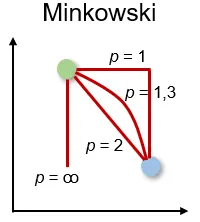

Minkowski distance is a generalized metric form of Euclidean Distance and Manhattan Distance.

$$
\text{Minkowski Distance}(A, B) = \left( \sum_{i=1}^{n} |a_i - b_i|^p \right)^{1/p}
$$

When $p=1$, it becomes Manhattan Distance, and when $p=2$, it becomes Euclidean Distance.

#### 3.4.7 Mahalanobis Distance

Mahalanobis Distance is used for measuring how many standard deviations an observation is away from the mean and it also takes into account the correlation between variables.

$$
\text{Mahalanobis Distance}(A, B) = \sqrt{(A - B)^T \Sigma^{-1} (A - B)}
$$

Where $\Sigma$ is the covariance matrix.

Each of these metrics has its advantages and drawbacks depending on the nature of the dataset and the problem you're trying to solve. It's often beneficial to experiment with different distance metrics to find the one that gives the best results for your specific case.

### 3.5 Computational Complexity

#### 3.5.1 Brute-Force Search

A simple but inefficient way to find the nearest neighbors. Computational complexity is $O(N^2)$.

#### 3.5.2 K-D Trees

K-D trees can be used to reduce the search time, making it $O(N \log N)$.


## 4 Conclusion

We have explored the K-Nearest Neighbors (KNN) algorithm, starting with a practical application on the Iris flower dataset before diving into the mathematical theory underpinning the model. 

The application section provided a hands-on demonstration of implementing KNN in Python using scikit-learn. We walked through key steps like preparing the data, tuning model hyperparameters like K and distance metrics, making predictions, and evaluating performance. The model achieved 100% accuracy on the test set, indicating exceptional effectiveness on this particular dataset.

The theory section delved into how KNN works under the hood. We learned that it is considered "lazy learning" as it doesn't explicitly train on the data like other models. Instead, KNN relies on calculating distances between points at prediction time to find the nearest neighbors and make a classification or regression prediction. We also explored different distance metrics that can be used, each with their own strengths and weaknesses. 

Understanding the balance between model flexibility and stability based on the choice of K is crucial for KNN's success. Overall, KNN shines when dealing with low-dimensional, easy to separate data. Computational complexity can become an issue for large datasets, but techniques like KD-trees can mitigate this.

While we focused on a simple dataset, the core techniques and analysis are applicable to more complex real-world scenarios. Some ways to build on this introductory exploration include:

 - Experimenting with larger, messier datasets from domains like finance, healthcare, or computer vision. This can demonstrate both the flexibility and limitations of KNN models.

 - Comparing KNN against other common algorithms like support vector machines, random forests or neural networks. Observing the relative strengths and weaknesses can help guide proper model selection.

 - Implementing computational optimizations like KD-trees when working with massive datasets where efficiency is critical.

 - Enhancing the distance metric calculations using kernel tricks to handle non-linear relationships between features.

The combination of intuition and mathematical rigor makes KNN an excellent introductory machine learning algorithm. This article provided both perspectives, equipping you with the knowledge to effectively apply KNN to new problems and datasets.

### 4.1 Next Steps

- Experiment with real-world data sets
- Explore other algorithms for comparison
